In [1]:
import unittest
import pandas as pd
import numpy as np
import networkx as nx
import datetime
from dowhy import gcm

from causal_gen.basic_ts_with_outlier import generate_root_data_with_outlier
from causal_gen.basic_ts_with_outlier import generate_child_normal_data
from causal_gen.basic_ts_with_outlier import generate_child_data_with_outlier
from causal_gen.basic_ts_with_outlier import generate_data_with_outliers
from causal_gen.basic_ts_with_outlier import merge_node_data_with_outliers

from causal_gen.basic_ts import find_root_children_nodes
from causal_gen.basic_ts import generate_root_data

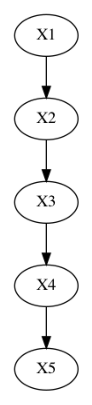

In [2]:
features = ('X1', 'X2', 'X3', 'X4', 'X5')
causal_graph = nx.DiGraph([('X1', 'X2'), 
                          ('X2', 'X3'),
                          ('X3', 'X4'),
                          ('X4', 'X5')])
gcm.util.plot(causal_graph, figure_size=[5, 5])

## Generate dataset by specifiying the position of the outliers

In [3]:
basic_time = datetime.datetime.now().timestamp()
time_propagation = 1.0 # in seconds
node_data = generate_data_with_outliers(causal_graph=causal_graph, 
                                            basic_time=basic_time, 
                                            n_data=20, 
                                            time_propagation=time_propagation, 
                                            n_outliers=2, 
                                            outlier_root_cause_node='X1',
                                            outlier_multiplier=3,
                                            outlier_position=(4,10))
df = merge_node_data_with_outliers(node_data = node_data, 
                              causal_graph = causal_graph, 
                              target_node = 'X5',
                              basic_time = basic_time,
                              time_propagation = time_propagation)
df

,X5,ts,X5_root_cause,label,root_cause_gt,X1,X1_root_cause,X2,X2_root_cause,X3,X3_root_cause,X4,X4_root_cause
0,2.731830,1.675788e+09,0.0,0.0,nan,0.502186,1.0,0.876584,0.0,1.606379,0.0,2.263016,0.0
1,3.013813,1.675788e+09,0.0,0.0,nan,0.073312,0.0,1.127424,0.0,1.396266,0.0,2.111991,0.0
2,3.133113,1.675788e+09,0.0,0.0,nan,0.205499,0.0,0.717973,0.0,1.674737,0.0,2.082971,0.0
3,2.842419,1.675788e+09,0.0,0.0,nan,0.107834,0.0,0.805310,0.0,1.429506,0.0,2.385308,0.0
4,3.100793,1.675788e+09,0.0,1.0,X1,0.092433,0.0,0.674288,0.0,1.429889,0.0,2.033288,0.0
5,2.731313,1.675788e+09,0.0,0.0,nan,0.088579,0.0,0.772148,0.0,1.202853,0.0,1.984538,0.0
6,2.495719,1.675788e+09,0.0,0.0,nan,0.321750,1.0,0.666125,0.0,1.537257,0.0,1.948977,0.0
7,2.602422,1.675788e+09,0.0,0.0,nan,0.093911,0.0,0.990533,0.0,1.171367,0.0,2.113202,0.0
8,2.649531,1.675788e+09,0.0,0.0,nan,0.049524,0.0,0.652404,0.0,1.735729,0.0,1.677835,0.0
9,2.302435,1.675788e+09,0.0,0.0,nan,0.217604,0.0,0.680780,0.0,1.171710,0.0,2.312469,0.0


## Generate dataset by randomly sampling the position of the outliers

In [4]:
basic_time = datetime.datetime.now().timestamp()
time_propagation = 1.0 # in seconds
node_data = generate_data_with_outliers(causal_graph=causal_graph, 
                                            basic_time=basic_time, 
                                            n_data=20, 
                                            time_propagation=time_propagation, 
                                            n_outliers=2, 
                                            outlier_root_cause_node='X2')
df = merge_node_data_with_outliers(node_data = node_data, 
                              causal_graph = causal_graph, 
                              target_node = 'X5',
                              basic_time = basic_time,
                              time_propagation = time_propagation)
df

,X5,ts,X5_root_cause,label,root_cause_gt,X1,X1_root_cause,X2,X2_root_cause,X3,X3_root_cause,X4,X4_root_cause
0,2.495075,1.675788e+09,0.0,0.0,nan,0.315906,0.0,1.055323,0.0,1.584789,0.0,1.817872,0.0
1,2.362002,1.675788e+09,0.0,0.0,nan,0.014825,0.0,0.840787,0.0,1.676636,0.0,2.329253,0.0
2,3.093037,1.675788e+09,0.0,0.0,nan,0.091524,0.0,1.888749,1.0,1.926606,0.0,2.320543,0.0
3,3.069280,1.675788e+09,0.0,0.0,nan,0.570545,0.0,0.864527,0.0,2.408087,0.0,2.888930,0.0
4,3.519358,1.675788e+09,0.0,0.0,nan,0.150488,0.0,1.073835,0.0,1.449596,0.0,3.080743,0.0
5,3.689244,1.675788e+09,0.0,1.0,X2,0.078158,0.0,0.757779,0.0,1.750857,0.0,2.061228,0.0
6,2.662176,1.675788e+09,0.0,0.0,nan,0.343869,0.0,0.848360,0.0,1.437184,0.0,2.273078,0.0
7,2.784348,1.675788e+09,0.0,0.0,nan,0.433294,0.0,2.027832,1.0,1.508281,0.0,2.100213,0.0
8,2.714245,1.675788e+09,0.0,0.0,nan,0.559813,0.0,1.092385,0.0,2.927835,0.0,2.198890,0.0
9,2.708398,1.675788e+09,0.0,0.0,nan,0.087553,0.0,1.167223,0.0,1.709473,0.0,3.666077,0.0
